# House Price Prediction 

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Used for displying plots inline
%matplotlib inline 

### Importing the house dataset

In [2]:
# Load the dataset
df = pd.read_csv('./dataset/house_dataset.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Exploratory Data Analysis

In [3]:
# Checking for the number of rows and columns
df.shape

(21613, 21)

In [4]:
# Checking for datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# Checking the statistics of the data
df.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [6]:
# Checking for statistics of the data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Checking for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Checking for column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
# Checking for correlation between two or more variables
correlation_variables = df[['price', 'bathrooms']].corr()
correlation_variables

,price,bathrooms
price,1.000000,0.525138
bathrooms,0.525138,1.000000


In [10]:
correlation_variables = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']].corr()
correlation_variables

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000


### Using heatmap to visualise correlation

<Axes: >

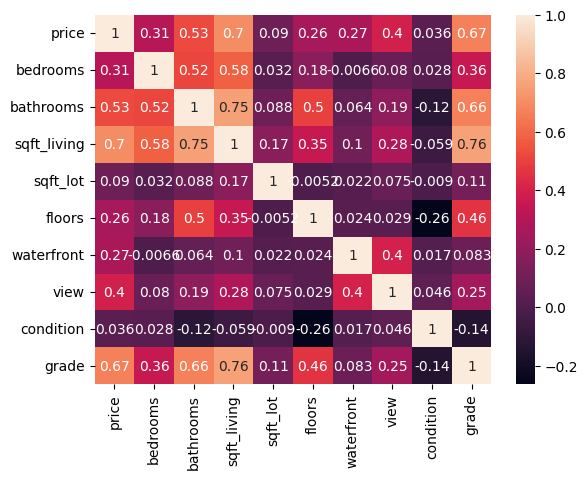

In [11]:
sns.heatmap(correlation_variables, annot=True)

<Axes: xlabel='bedrooms', ylabel='price'>

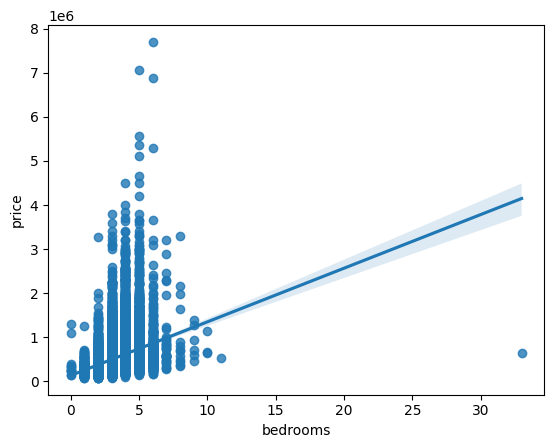

In [12]:
#Checking correlation using regplot
sns.regplot(x="bedrooms", y='price', data = df)

<Axes: xlabel='sqft_living', ylabel='price'>

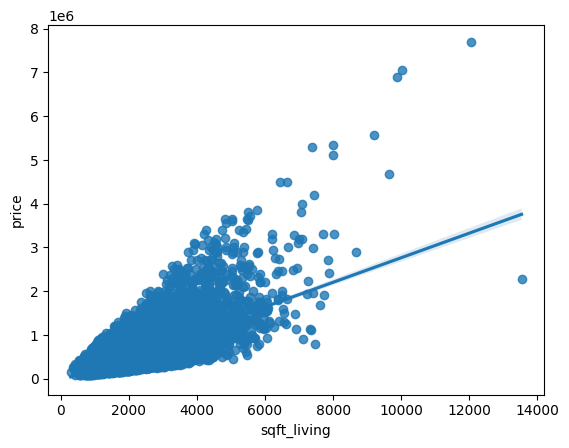

In [13]:
sns.regplot(x='sqft_living', y='price', data=df)

## Data Preprocessing

In [14]:
X =df[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

y= df['price']

In [15]:

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [16]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [17]:
X.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check for outliers

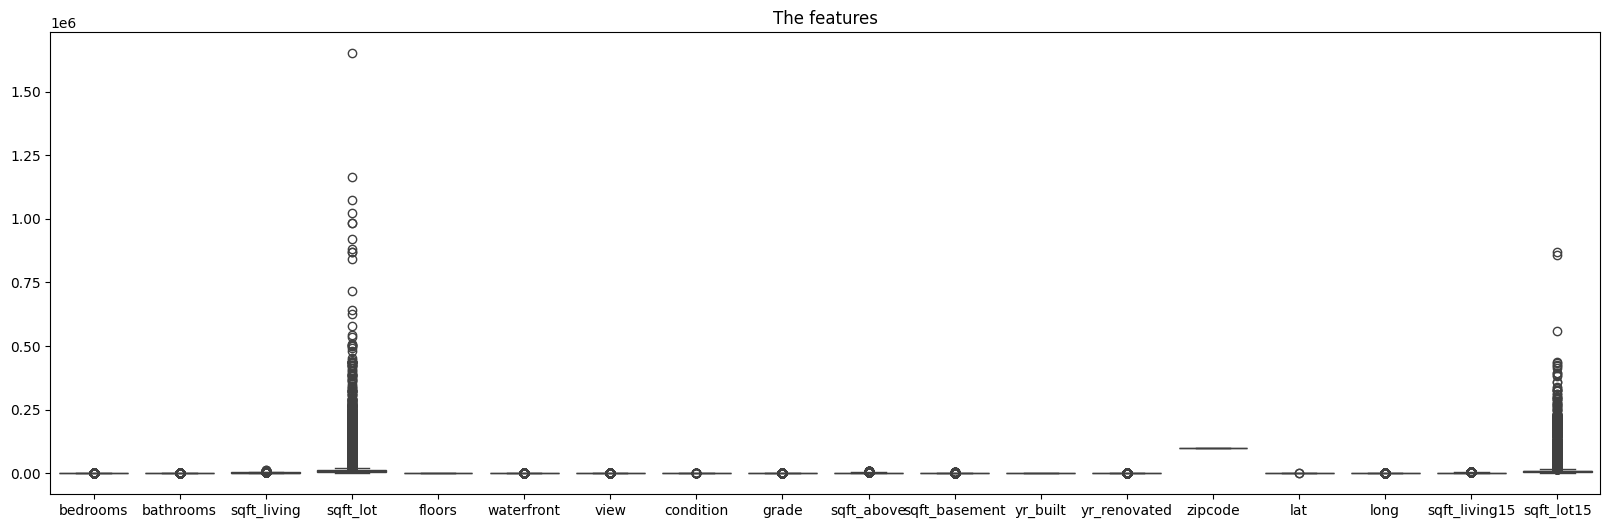

In [18]:
# Create a boxplot to check for outliers
plt.figure(figsize=(20, 6))
sns.boxplot(X)
plt.title('The features')
plt.show()

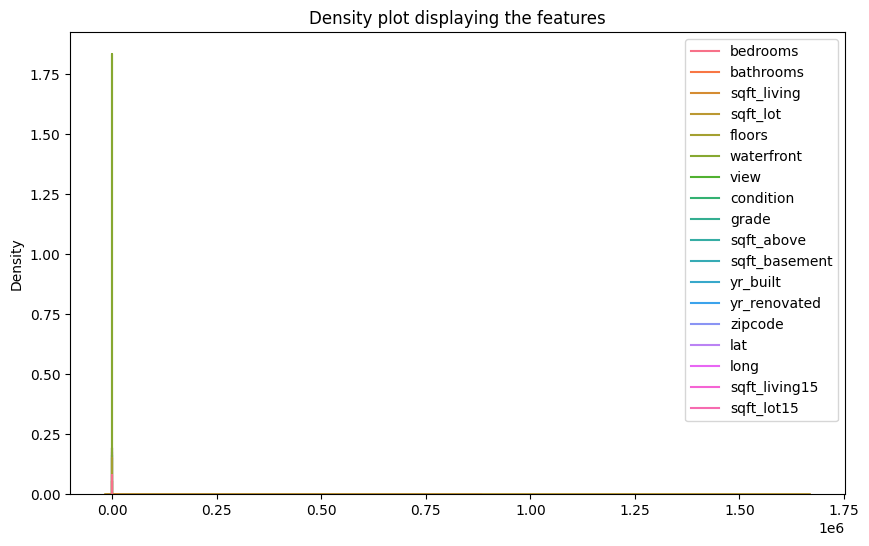

In [19]:
 # Create a desity plot
plt.figure(figsize=(10, 6))
sns.kdeplot(X)
plt.title('Density plot displaying the features')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
# Initialise the StandardScaler
scaler = StandardScaler()

# select numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Fit and transform numerical features
X[numerical_features] = scaler.fit_transform(X[numerical_features])
X[numerical_features]



/tmp/ipykernel_89966/1501606737.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numerical_features] = scaler.fit_transform(X[numerical_features])


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,1.870152,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,0.879568,1.161568,-0.746341,-0.432686,-0.187868
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,-0.933388,1.283537,-0.135655,1.070140,-0.172375
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,1.085160,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,-0.073636,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,0.468382,1.004958,-0.938069,-0.666135,-0.412381
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,1.272063,-0.356180,-1.051685,-0.228419,-0.203946
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,1.234683,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.952078,-0.184414,1.028910,-0.841221,-0.420511


## Model development

In [21]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
# Initialize LinearRegression
LR = LinearRegression()


In [23]:
# Train the model
LR.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
LR_pred = LR.predict(X_test)
LR_pred

array([ 461209.94695867,  752443.5100695 , 1238489.80205784, ...,
        423101.46384868,  617785.6141686 ,  442344.46084991])

# Decision Tree Regressor

In [25]:
# DecisionTreeRegressor is supervised learning algorithm that uses a tree-like model to predict continuous outcomes based on input features.
from sklearn.tree import DecisionTreeRegressor 
# Initialise DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state=42)
# Train the model
DTR.fit(X_train, y_train)
# Make predictions
DTR_pred = DTR.predict(X_test)
DTR_pred

array([ 363000.,  710000., 1225000., ...,  280000.,  537000.,  329950.])

## Random Forest Regressor 

In [26]:
# Random Forest Regressor is an ensembled learning method that combines multiple decision trees to improve acuracy and robustness of prediction
from sklearn.ensemble import RandomForestRegressor
# Initialize RandomForest
RF = RandomForestRegressor(n_estimators=100, random_state=42)
# Train the model
RF.fit(X_train, y_train)
# Make predictions
RF_pred = RF.predict(X_test)
RF_pred



array([ 376243.        ,  885965.61      , 1104549.73333333, ...,
        282807.45      ,  582384.8       ,  343926.57      ])

# Model Evaluation

In [27]:
#Importing the libraries for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Model evaluation using mean_squared_error

In [28]:
mse_LR = mean_squared_error(LR_pred, y_test)
mse_DTR = mean_squared_error(DTR_pred, y_test)
mse_RF = mean_squared_error(RF_pred, y_test)

print("mean_square_error of Linear Regression", mse_LR)
print("mean_square_error of Decision Tree Regressor ", mse_DTR)
print("mean_square_error of Random Forest Regressor", mse_RF)

mean_square_error of Linear Regression 45173046132.79015
mean_square_error of Decision Tree Regressor  42825525914.106346
mean_square_error of Random Forest Regressor 22114624764.573048


## Model evaluation using R sqaured

In [29]:
Rscore_LR = r2_score(LR_pred, y_test)
Rscore_DTR = r2_score(DTR_pred, y_test)
Rscore_RF = r2_score(RF_pred, y_test)

print("R Squared of Linear Regrssion:",  Rscore_LR)
print("R Squared of Decision Tree Regressor:",  Rscore_DTR)
print("R Squared of Random Forest Regressor:",  Rscore_RF)

R Squared of Linear Regrssion: 0.5520387560657898
R Squared of Decision Tree Regressor: 0.7340234834672965
R Squared of Random Forest Regressor: 0.8358912078110015


## Decision Making

Decision: The model with the lowest Mean suared error and the heigest R squared is the best model for our dataset

After evaluation, we observed that Random Forest Regressor is the best model for our data 


## Package the model

In [30]:
import joblib
joblib.dump( RF, './model/trained_model.pkl')

['./model/trained_model.pkl']

## Practical test of the model

In [31]:
import pandas as pd

# Create a new dataframe with the input features
input_df = pd.DataFrame({
    'bedrooms': [4],
    'bathrooms': [2.5],
   'sqft_living': [2500],
   'sqft_lot': [5000],
    'floors': [2],
    'waterfront': [0],
    'view': [2],
    'condition': [4],
    'grade': [8],
   'sqft_above': [2500],
   'sqft_basement': [0],
    'yr_built': [2010],
    'yr_renovated': [0],
    'zipcode': [98103],
    'lat': [47.5],
    'long': [-122.2],
   'sqft_living15': [2400],
   'sqft_lot15': [5000]
})

# Load the trained model
model = joblib.load('./model/trained_model.pkl')

# Make a prediction
prediction = model.predict(input_df)

print("Predicted price:", prediction)

Predicted price: [6193848.]
